In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
PRESS = 'A'
LEFT = '<'
RIGHT = '>'
UP = '^'
DOWN = 'v'

NUMERIC_KEYPAD = {
    '0' : (1, 0),
    PRESS : (2, 0),
    '1' : (0, 1),
    '2' : (1, 1),
    '3' : (2, 1),
    '4' : (0, 2),
    '5' : (1, 2),
    '6' : (2, 2),
    '7' : (0, 3),
    '8' : (1, 3),
    '9' : (2, 3)
}

DIRECTIONAL_KEYPAD = {
    LEFT : (0,0),
    DOWN : (1,0),
    RIGHT : (2,0),
    UP : (1,1),
    PRESS : (2, 1)
}

In [3]:
# <vA<AA>>^AvAA<^A>A<v<A>>^AvA^A<vA>^A<v<A>^A>AAvA^A<v<A>A>^AAAvA<^A>A
# v<<A>>^A<A>AvA<^AA>A<vAAA>^A
# <A^A>^^AvvvA
# 029A

# <v<A>>^AAAvA^A<vA<AA>>^AvAA<^A>A<v<A>A>^AAAvA<^A>A<vA>^A<A>A
# <AA
# ^^^A<AvvvA>A
# 980A

#
#
# ^<<A^^A>>AvvvA
# 179A

#
#
# ^^<<A>A>AvvA
# 456A

# 
# 
# ^A^^<<A>>AvvvA
# 379A

# 029A: <vA<AA>>^AvAA<^A>A<v<A>>^AvA^A<vA>^A<v<A>^A>AAvA^A<v<A>A>^AAAvA<^A>A
# 980A: <v<A>>^AAAvA^A<vA<AA>>^AvAA<^A>A<v<A>A>^AAAvA<^A>A<vA>^A<A>A
# 179A: <v<A>>^A<vA<A>>^AAvAA<^A>A<v<A>>^AAvA^A<vA>^AA<A>A<v<A>A>^AAAvA<^A>A
# 456A: <v<A>>^AA<vA<A>>^AAvAA<^A>A<vA>^A<A>A<vA>^A<A>A<v<A>A>^AAvA<^A>A
# 379A: <v<A>>^AvA^A<vA<AA>>^AAvA<^A>AAvA^A<vA>^AA<A>A<v<A>A>^AAAvA<^A>A

In [4]:
# 029A (1S4C) -> 4S12C -> 12S28C -> 28S68C
# 980A (1S4C) -> 4S12C -> 12S26C -> 26S60C
# 179A (1S4C) -> 4S14C -> 14S28C -> 28S68C
# 456A (1S4C) -> 4S12C -> 12S26C -> 26S64C
# 379A (1S4C) -> 4S14C -> 14S28C -> 28S64C

In [10]:
class Sequence:
    def __init__(self, keypad : dict, sequence) -> None:
        self.keypad = keypad
        self.sequence = sequence

    def complexity(self):
        p = np.array(self.keypad[PRESS])
        c = 0
        movements = []
        for l in self.sequence:
            v = np.array(self.keypad[l]) - p
            movements.append(v)
            p = np.array(self.keypad[l])
            c += np.sum(np.abs(v))
        
        return c

class NumericSequence(Sequence):
    def __init__(self, sequence) -> None:
        super().__init__(NUMERIC_KEYPAD, sequence)

class DirectionalSequence(Sequence):
    def __init__(self, sequence) -> None:
        super().__init__(DIRECTIONAL_KEYPAD, sequence)

sequences = [
    NumericSequence('029A'),
    NumericSequence('980A'),
    NumericSequence('179A'),
    NumericSequence('456A'),
    NumericSequence('379A')
]

for s in sequences:
    print(f'{s.sequence} : {s.complexity() + len(s.sequence)}')

029A : 12
980A : 12
179A : 14
456A : 12
379A : 14


In [6]:
# 8+4 -> 12
# 10+4 -> 14

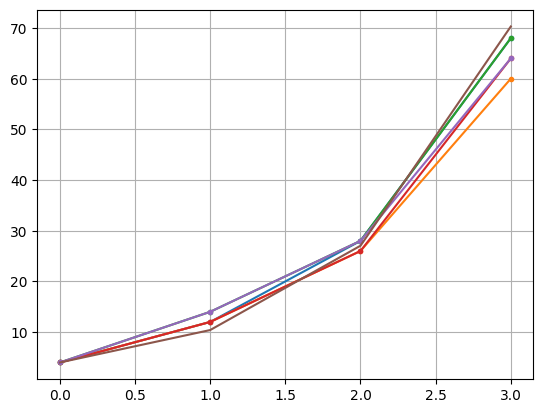

In [9]:


progressions = np.array([
    [4, 12, 28, 68],
    [4, 12, 26, 60],
    [4, 14, 28, 68],
    [4, 12, 26, 64],
    [4, 14, 28, 64],
]).T

N = 4
n = np.arange(N)
plt.plot(progressions, '.-')
plt.plot(n, 4*2.6**n)
plt.grid()
plt.show()